In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("data/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.replace(to_replace ="M", value = 1, inplace = True)
df.replace(to_replace ="B", value = 0, inplace = True)

In [4]:
names = list(df.columns)
print(names)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [5]:
names.pop(0)
names.pop(0)
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [41]:
smaller = []
m = 10000
for name in names:
    Y=df['diagnosis']
    features = [name]
    X = df[features]
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

    n_iter=100
    clf_ = SGDRegressor(max_iter=n_iter)
    clf_.fit(x_train, y_train)
    y_pred_sksgd=clf_.predict(x_test)
    mse = mean_squared_error(y_test, y_pred_sksgd)
    
    if mse <= 0.25:
        smaller.append(name)
    if mse < m:
        m = mse
        elm = name
        
print(m)
print(elm)

0.11162391636435444
radius_worst


C:\Users\whitn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [25]:
def getCombinations(seq):
    combinations = list()
    for i in range(0,len(seq)):
        for j in range(i+1,len(seq)):
            combinations.append([seq[i],seq[j]])
    return combinations

In [35]:
res = getCombinations(smaller)

In [40]:
m = 1000

for i in range(len(res)):
    Y=df['diagnosis']
    features = res[i]
    X = df[features]
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

    n_iter=100
    clf_ = SGDRegressor(max_iter=n_iter)
    clf_.fit(x_train, y_train)
    y_pred_sksgd=clf_.predict(x_test)
    mse = mean_squared_error(y_test, y_pred_sksgd)
    
    if mse < m:
        m = mse
        elm = component
        
print(m)
print(elm)

0.0949063064893014
['radius_mean', 'smoothness_mean']


In [52]:
m = 1000

for name in names:
    Y=df['diagnosis']
    features = [name]
    X = df[features]
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
    
    classifier = SVC(kernel='rbf', random_state = 1)
    classifier.fit(x_train,y_train)
    Y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test,Y_pred)
    accuracy = float(cm.diagonal().sum())/len(y_test)
    
    if m > accuracy:
        m = accuracy
        curr = name
        
print(m, curr)

0.6081871345029239 fractal_dimension_mean


In [54]:
m = 1000

for i in range(len(res)):
    Y=df['diagnosis']
    features = res[i]
    X = df[features]
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

    classifier = SVC(kernel='rbf', random_state = 1)
    classifier.fit(x_train,y_train)
    Y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test,Y_pred)
    accuracy = float(cm.diagonal().sum())/len(y_test)
    
    if m > accuracy:
        m = accuracy
        curr = features
        
print(m, curr)

0.5789473684210527 ['symmetry_mean', 'texture_se']


In [55]:
Y=df['diagnosis']
X = df[names]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(x_train,y_train)
Y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
    
print(accuracy)

0.9239766081871345


In [59]:
m = 1000

for name in names:
    Y=df['diagnosis']
    features = [name]
    X = df[features]
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
    
    classifier = GaussianNB()
    classifier.fit(x_train,y_train)
    Y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test,Y_pred)
    accuracy = float(cm.diagonal().sum())/len(y_test)
    
    if m > accuracy:
        m = accuracy
        curr = name
        
print(m, curr)

0.5672514619883041 fractal_dimension_se


In [60]:
m = 1000

for i in range(len(res)):
    Y=df['diagnosis']
    features = res[i]
    X = df[features]
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

    classifier = GaussianNB()
    classifier.fit(x_train,y_train)
    Y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test,Y_pred)
    accuracy = float(cm.diagonal().sum())/len(y_test)
    
    if m > accuracy:
        m = accuracy
        curr = features
        
print(m, curr)

0.5672514619883041 ['fractal_dimension_mean', 'smoothness_se']


In [61]:
Y=df['diagnosis']
X = df[names]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

classifier = GaussianNB()
classifier.fit(x_train,y_train)
Y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
    
print(accuracy)

0.935672514619883


In [67]:
m = 1000

for name in names:
    Y=df['diagnosis']
    features = [name]
    X = df[features]
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
    
    for n in range(1, 26):
        classifier = KNeighborsClassifier(n_neighbors = n)
        classifier.fit(x_train,y_train)
        Y_pred = classifier.predict(x_test)
        cm = confusion_matrix(y_test,Y_pred)
        accuracy = float(cm.diagonal().sum())/len(y_test)
    
        if m > accuracy:
            m = accuracy
            curr = name
            num = n
        
print(m, curr, num)

0.47953216374269003 smoothness_se 1


In [ ]:
m = 1000

for i in range(len(res)):
    features = res[i]
    X = df[features]
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
    
    for n in range(1, 26):
        classifier = KNeighborsClassifier(n_neighbors = n)
        classifier.fit(x_train,y_train)
        Y_pred = classifier.predict(x_test)
        cm = confusion_matrix(y_test,Y_pred)
        accuracy = float(cm.diagonal().sum())/len(y_test)
    
        if m > accuracy:
            m = accuracy
            curr = name
            num = n
        
print(m, curr, num)

0.49707602339181284 fractal_dimension_worst 1


In [69]:
Y=df['diagnosis']
X = df[names]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

m = 1000
for n in range(1, 26):
    classifier = KNeighborsClassifier(n_neighbors = n)
    classifier.fit(x_train,y_train)
    Y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test,Y_pred)
    accuracy = float(cm.diagonal().sum())/len(y_test)
    
    if m > accuracy:
        m = accuracy
        num = n
        
print(m, num)

0.9064327485380117 1


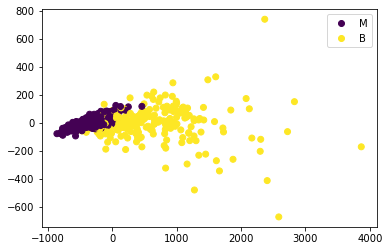

In [8]:
X = df[names]
pca = PCA()
Xt = pca.fit_transform(X)
y = df['diagnosis']
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=['M', 'B'])
plt.show()